In [1]:
import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,DATX,MDTX,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1960-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.00,NaN,77.0,83.0,67.0
1960-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.00,NaN,74.0,83.0,70.0
1960-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.02,NaN,72.0,79.0,69.0
1960-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.47,NaN,67.0,71.0,63.0
1960-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.55,NaN,66.0,75.0,61.0
...,...,...,...,...,...,...,...,...,...
2024-04-18,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.09,NaN,64.0,73.0,NaN
2024-04-19,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.09,NaN,65.0,69.0,55.0
2024-04-20,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.27,NaN,65.0,67.0,59.0


In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
DATX       0.999915
MDTX       0.999915
PRCP       0.000468
SNWD       0.999787
TAVG       0.050798
TMAX       0.001277
TMIN       0.002342
dtype: float64

In [4]:
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "temp_max", "temp_min"]

In [5]:
core_weather.apply(pd.isnull).sum()

precip      11
temp_max    30
temp_min    55
dtype: int64

In [6]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
2015-11-12,NaN,80.0,65.0
2015-12-17,NaN,82.0,60.0
2017-03-15,NaN,81.0,68.0
2017-03-19,NaN,82.0,NaN
2017-03-23,NaN,73.0,69.0
2017-11-29,NaN,81.0,68.0
2017-12-21,NaN,77.0,69.0
2022-02-02,NaN,71.0,67.0
2024-03-26,NaN,NaN,65.0


In [7]:
core_weather.loc["2013-12-15",:]

precip       0.24
temp_max    76.00
temp_min    65.00
Name: 2013-12-15, dtype: float64

In [8]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00    0.642325
0.01    0.041218
0.02    0.037598
0.06    0.015840
0.03    0.015372
          ...   
2.48    0.000043
2.70    0.000043
3.25    0.000043
2.01    0.000043
5.71    0.000043
Name: precip, Length: 341, dtype: float64

In [9]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [10]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max    30
temp_min    55
dtype: int64

In [11]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
1968-02-27,0.00,77.0,NaN
1987-03-20,0.50,82.0,NaN
1987-04-09,0.14,63.0,NaN
1987-10-22,0.00,68.0,NaN
1988-02-15,0.24,71.0,NaN
1988-07-26,0.00,64.0,NaN
1988-08-24,0.94,59.0,NaN
1990-07-01,0.05,63.0,NaN
2000-02-06,0.00,73.0,NaN


In [12]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.00,76.0,61.0
2011-12-19,0.00,76.0,68.0
2011-12-20,0.35,71.0,66.0
2011-12-21,0.00,73.0,65.0
2011-12-22,0.03,73.0,66.0
2011-12-23,0.16,78.0,66.0
2011-12-24,0.39,80.0,69.0
2011-12-25,0.00,83.0,68.0
2011-12-26,0.00,83.0,69.0


In [13]:
core_weather = core_weather.fillna(method="ffill")

In [14]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [15]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [16]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [17]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
       '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22'],
      dtype='object', name='DATE', length=23485)

In [18]:
core_weather.index = pd.to_datetime(core_weather.index)

In [19]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
               '2024-04-21', '2024-04-22'],
              dtype='datetime64[ns]', name='DATE', length=23485, freq=None)

In [20]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
           dtype='int64', name='DATE', length=23485)

<Axes: xlabel='DATE'>

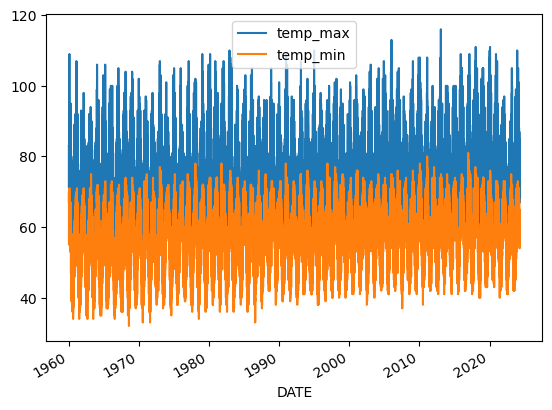

In [21]:
core_weather[["temp_max", "temp_min"]].plot()

In [22]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2020    366
2021    365
2022    365
2023    365
2024    109
Name: DATE, Length: 65, dtype: int64

<Axes: xlabel='DATE'>

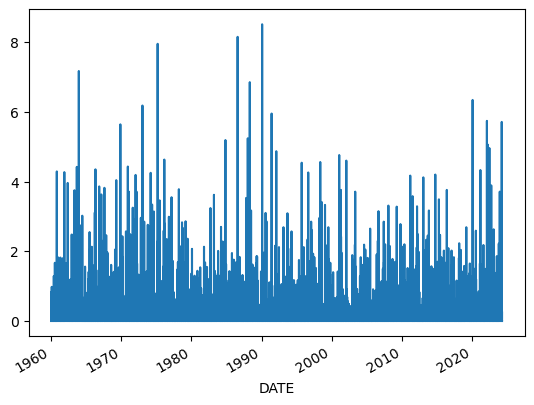

In [23]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

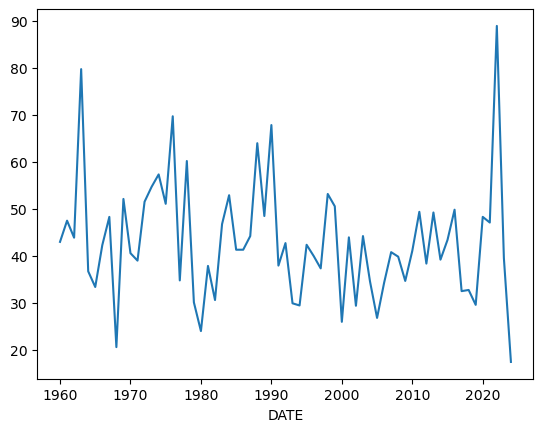

In [24]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [25]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [26]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,83.0,67.0,83.0
1960-01-02,0.00,83.0,70.0,79.0
1960-01-03,0.02,79.0,69.0,71.0
1960-01-04,0.47,71.0,63.0,75.0
1960-01-05,0.55,75.0,61.0,75.0
...,...,...,...,...
2024-04-18,0.09,73.0,62.0,69.0
2024-04-19,0.09,69.0,55.0,67.0
2024-04-20,0.27,67.0,59.0,69.0


In [27]:
core_weather = core_weather.iloc[:-1,:].copy()

In [28]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,83.0,67.0,83.0
1960-01-02,0.00,83.0,70.0,79.0
1960-01-03,0.02,79.0,69.0,71.0
1960-01-04,0.47,71.0,63.0,75.0
1960-01-05,0.55,75.0,61.0,75.0
...,...,...,...,...
2024-04-17,0.02,71.0,62.0,73.0
2024-04-18,0.09,73.0,62.0,69.0
2024-04-19,0.09,69.0,55.0,67.0


In [29]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [30]:
predictors = ["precip", "temp_max", "temp_min"]

In [31]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [32]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,83.0,67.0,83.0
1960-01-02,0.00,83.0,70.0,79.0
1960-01-03,0.02,79.0,69.0,71.0
1960-01-04,0.47,71.0,63.0,75.0
1960-01-05,0.55,75.0,61.0,75.0
...,...,...,...,...
2020-12-27,0.01,87.0,64.0,77.0
2020-12-28,0.00,77.0,72.0,69.0
2020-12-29,0.34,69.0,62.0,77.0


In [33]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.23,73.0,65.0,70.0
2021-01-02,0.05,70.0,62.0,79.0
2021-01-03,0.23,79.0,63.0,85.0
2021-01-04,0.04,85.0,68.0,83.0
2021-01-05,0.27,83.0,67.0,75.0
...,...,...,...,...
2024-04-17,0.02,71.0,62.0,73.0
2024-04-18,0.09,73.0,62.0,69.0
2024-04-19,0.09,69.0,55.0,67.0


In [34]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [35]:
predictions = reg.predict(test[predictors])

In [36]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

34.273363456837586

In [37]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [38]:
combined

,actual,predictions
DATE,,
2021-01-01,70.0,75.315543
2021-01-02,79.0,73.083202
2021-01-03,85.0,77.461136
2021-01-04,83.0,81.945018
2021-01-05,75.0,80.560001
...,...,...
2024-04-17,73.0,73.564972
2024-04-18,69.0,74.448945
2024-04-19,67.0,70.373313


<Axes: xlabel='DATE'>

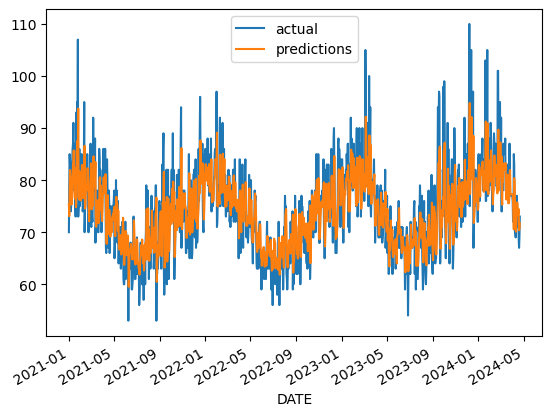

In [39]:
combined.plot()

In [40]:
reg.coef_

array([-0.61204921,  0.46340833,  0.3174284 ])

In [41]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [42]:
core_weather = core_weather.iloc[30:,:].copy()

In [43]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [44]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

32.74949339755727

<Axes: xlabel='DATE'>

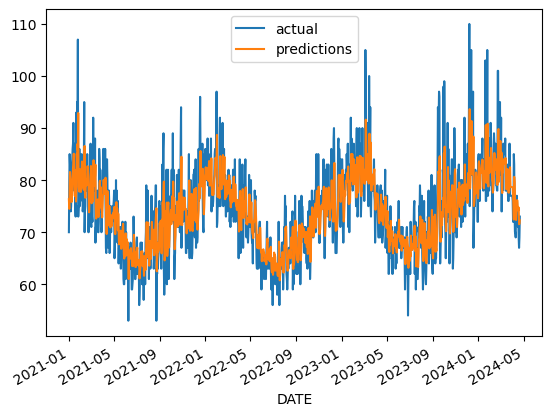

In [45]:
combined.plot()

In [46]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

C:\Users\okuma\AppData\Local\Temp\ipykernel_16916\342247207.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
C:\Users\okuma\AppData\Local\Temp\ipykernel_16916\342247207.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence th

In [47]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

31.694899523237947

In [48]:
reg.coef_

array([-0.548816  ,  0.09368126,  0.41983414, -1.54071597, 15.78802089,
        0.42622668,  0.14283235])

In [49]:
core_weather.corr()["target"]

precip            -0.057544
temp_max           0.694390
temp_min           0.650105
target             1.000000
month_max          0.676486
month_day_max     -0.291805
max_min           -0.168629
monthly_avg        0.688764
day_of_year_avg    0.693235
Name: target, dtype: float64

In [50]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [51]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2023-12-08,110.0,85.062224,24.937776
2023-10-02,99.0,74.078569,24.921431
2023-03-05,105.0,81.177529,23.822471
2023-09-30,98.0,74.921949,23.078051
2023-12-13,105.0,82.679891,22.320109
2024-01-25,105.0,83.365992,21.634008
2021-01-25,107.0,85.517988,21.482012
2024-02-22,101.0,80.317955,20.682045
2024-01-20,103.0,82.924898,20.075102
